####  independent var. : 7개중에 4개만 골라서 선택
#### dependent(target) var. : 품종 (Class)
- target : 문자열을 숫자로 바꾸어야한다.

- 분류기 만들기

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, LogisticRegression, SGDClassifier
from sklearn.metrics import RocCurveDisplay, roc_auc_score

In [177]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [178]:
file = 'Raisin_Dataset.CSV'
df = pd.read_csv(file, encoding = 'cp949')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [179]:
def Kecimen(df):
    if 'Kecimen' in df:
        return 0
    else:
        return 1
    
    
#bool filter
#df['Class'] = df['Class']=='Kecimen' (True, False값으로도 분류모델의 target설정이 가능하다.)

#cat.codes(pandas category dtype)
#df['Class'] = df['Class'].astype('category').cat.codes
 
    
# pandas replace
# df['Class'].str.replace('Kecimen', 0, inplace = True)
# df['Class'].str.replace('Besni', 1, inplace = True)

#custom category dtype
#sklearn label encoder

In [180]:
#cat.codes(pandas category dtype)

from pandas.api.types import CategoricalDtype

myclass_dtype = CategoricalDtype(['Kecimen', 'Besni'], ordered = True)

df['class'] = df['Class'].astype(myclass_dtype).cat.codes

In [206]:
#sklearn label encoder -- preprocessing
df_data = pd.read_csv(file, encoding = 'cp949')

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
#enc.fit(df_data['Class'].unique())
#enc.transform(df_data['Class'])

enc.fit_transform(df_data['Class'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [181]:
#df['class'] = df['Class'].apply(Kecimen)

In [182]:
df = df.drop(['Class'], axis = 1)

In [183]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,1
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,1
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,1
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,1


/home/jjam/.local/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, '상관도 Heatmap')

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


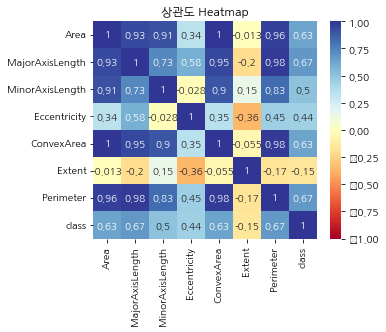

In [184]:
fig, axe = plt.subplots(figsize=(5,4))
axe = sns.heatmap(df.corr(), cmap='RdYlBu', annot=True, vmin=-1, vmax=1)
axe.set_title('상관도 Heatmap')

# 상관도 높은 4개 == Area, MajorAxisLength, ConvexArea, Perimeter

In [185]:
df1 = df.drop(['MinorAxisLength', 'Eccentricity', 'Extent', 'class'], axis = 1)

In [186]:
X = df1
y = df['class']
print(X)

      Area  MajorAxisLength  ConvexArea  Perimeter
0    87524       442.246011       90546   1184.040
1    75166       406.690687       78789   1121.786
2    90856       442.267048       93717   1208.575
3    45928       286.540559       47336    844.162
4    79408       352.190770       81463   1073.251
..     ...              ...         ...        ...
895  83248       430.077308       85839   1129.072
896  87350       440.735698       90899   1214.252
897  99657       431.706981      106264   1292.828
898  93523       476.344094       97653   1258.548
899  85609       512.081774       89197   1272.862

[900 rows x 4 columns]


In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

In [188]:
for m in [LinearRegression(), SGDRegressor(max_iter=1000), Ridge(alpha = 0.1), 
          Lasso(alpha = 0.1), LogisticRegression(solver = 'liblinear'), SGDClassifier(loss = 'log_loss')]:
    m.fit(X_train, y_train)
    print('train score : ', m.score(X_train, y_train))
    print('test score : ', m.score(X_test, y_test))
    print('')
    
# 가장 좋은 모델은 LogisticRegression이다.

/home/jjam/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.008e+01, tolerance: 1.687e-02
  model = cd_fast.enet_coordinate_descent(


train score :  0.5081157417323494
test score :  0.4938834320071912

train score :  -2.1322280507589373e+38
test score :  -2.0428336887135568e+38

train score :  0.5081157417323485
test score :  0.4938834303184151

train score :  0.508042384936498
test score :  0.4937645125571405

train score :  0.8503703703703703
test score :  0.8844444444444445

train score :  0.5066666666666667
test score :  0.48



In [189]:
m = LogisticRegression(solver = 'liblinear')
m.fit(X_train, y_train)
print(m.score(X_test, y_test))

0.8844444444444445


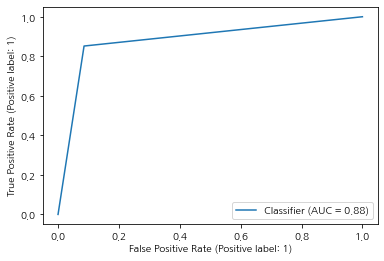

In [190]:
RocCurveDisplay.from_predictions(y_test, m.predict(X_test))

## 또 다른 방법

In [191]:
# 두개가 차이나는 것 두개가 차이가 큰 것 4개
g1 = df.groupby('class')
print(g1.mean())

                Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
class                                                                  
0       63413.466667       352.859249       229.352592      0.741960   
1      112194.788889       509.000652       279.623674      0.821125   

          ConvexArea    Extent    Perimeter  
class                                        
0       65696.355556  0.707774   983.686236  
1      116675.824444  0.691242  1348.127036  


In [197]:
X = df[['Area', 'MajorAxisLength', 'Eccentricity', 'Perimeter']]
y = df['class']

In [198]:
#print(X)
#print(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state =10)

In [199]:
print(type(X_train), X_train.shape)

<class 'pandas.core.frame.DataFrame'> (675, 4)


In [200]:
m = LogisticRegression(solver = 'liblinear')
m.fit(X_train, y_train)
print('train score : ', m.score(X_train, y_train))
print('test score : ', m.score(X_test, y_test))

train score :  0.7911111111111111
test score :  0.8355555555555556


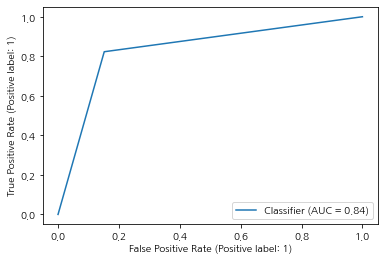

In [201]:
RocCurveDisplay.from_predictions(y_test, m.predict(X_test))

In [202]:
m = SGDClassifier(loss = 'log_loss')
m.fit(X_train, y_train)
print('train score : ', m.score(X_train, y_train))
print('test score : ', m.score(X_test, y_test))

train score :  0.5007407407407407
test score :  0.49777777777777776


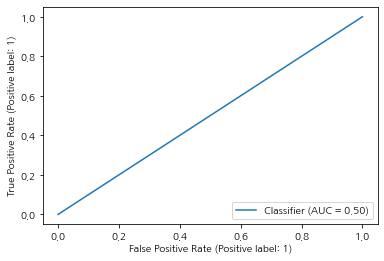

In [203]:
RocCurveDisplay.from_predictions(y_test, m.predict(X_test))

[[0.29637031 0.28071404 0.7678721  0.27179088]
 [0.23742726 0.23463777 0.73863618 0.24184205]
 [0.31226271 0.2807413  0.73300911 0.28359405]
 ...
 [0.3542402  0.26705647 0.60801693 0.32412604]
 [0.32498331 0.32490187 0.81025935 0.3076348 ]
 [0.28723648 0.37121445 0.91069529 0.3145209 ]]
[[-0.00718637  0.09757695  0.42314164  0.06627397]
 [-0.32421719 -0.20901207  0.22447639 -0.16125245]
 [ 0.07829241  0.09775835  0.18623907  0.15594468]
 ...
 [ 0.30407232  0.00670023 -0.6631136   0.46387322]
 [ 0.14671134  0.39160036  0.71117344  0.3385864 ]
 [-0.05631357  0.69976181  1.39366043  0.39090133]]


/home/jjam/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


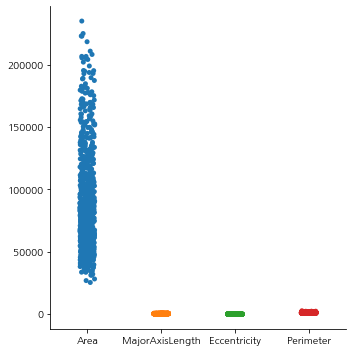

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


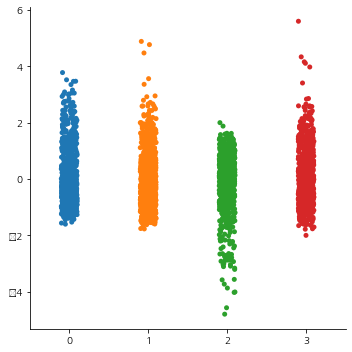

In [213]:
# MinMaxscaler == scale을 맞춰주는 과정이다.
# Standardscaler도 있다.

X = df[['Area', 'MajorAxisLength', 'Eccentricity', 'Perimeter']]

sns.catplot(X)

from sklearn.preprocessing import MinMaxScaler, StandardScaler

mms = MinMaxScaler()

print(mms.fit_transform(X))

sds = StandardScaler()
print(sds.fit_transform(X))

X = sds.fit_transform(X)
sns.catplot(X)

In [ ]:
.